### 掌握了基本的数据分析方法之后，相信大家都希望能够将数据可视化，特别是客户只能理解图片，
### 看不懂也不想自己去费力去理解分析得出的数据，所以画图就显得很重要了，往往也是数据分析的最后一步。
### 现在市面上有很多成熟的画图工具，特别是利用js在前端绘制美轮美奂的图像，而且很多还是动态的，
### 有兴趣的同学可以自行搜索echart等进行学习，我们在这里只讲解如何利用python的matplotlib库绘制基本，
### 但实用的几种基本图像。

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd

# 导入绘图库
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
# 查看可用的绘图风格
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# 设置绘图采用的风格
plt.style.use('seaborn-whitegrid')

#### 绘制折线图

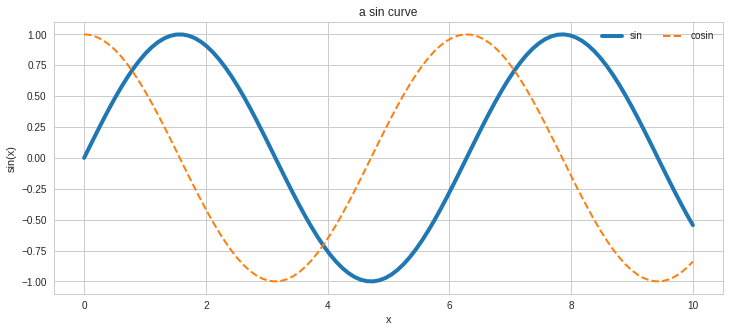

In [64]:
# 使用matplot风格绘制简单折线图
x = np.linspace(0,10,100)
fig = plt.figure(figsize=(12,5))
plt.plot(x,np.sin(x),'-',linewidth=4,label='sin')
plt.plot(x,np.cos(x),'--',linewidth=2,label='cosin')
plt.title("a sin curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend(loc='upper right',frameon=False,ncol=2)

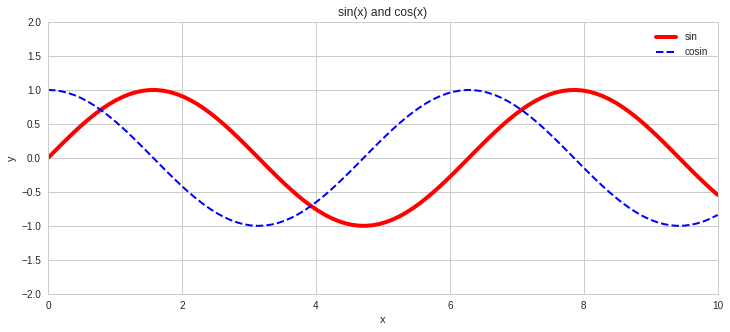

In [66]:
# 使用面向对象的风格绘制同样的图像
fig,ax = plt.subplots()
# 设置图像的大小
fig.set_figheight(5)
fig.set_figwidth(12)
# 在坐标轴内绘制图像
ax.plot(x,np.sin(x),'-',color='red',linewidth=4,label='sin')
ax.plot(x,np.cos(x),'--',color='blue',linewidth=2,label='cosin')
# 设置坐标轴上下限，名称以及标题
ax.set(xlim=(0,10),ylim=(-2,2),xlabel='x',ylabel='y',title='sin(x) and cos(x)')
# 设置并显示图例
ax.legend(fancybox=True,framealpha=1,shadow=True,borderpad=0.5)

#### 示例 ：设置x轴和y轴显示的坐标值

In [49]:
# 准备数据
x = range(2,26,2)
y = [15,14.3,21,17,20,25,26,26,22,18,15,16]

In [50]:
# 设置图片大小和每英尺的像素点数
plt.figure(figsize=(12,5),dpi=80)

<Figure size 960x400 with 0 Axes>

<Figure size 960x400 with 0 Axes>

([<matplotlib.axis.YTick at 0x7f449431b4e0>,
 <a list of 7 Text major ticklabel objects>)

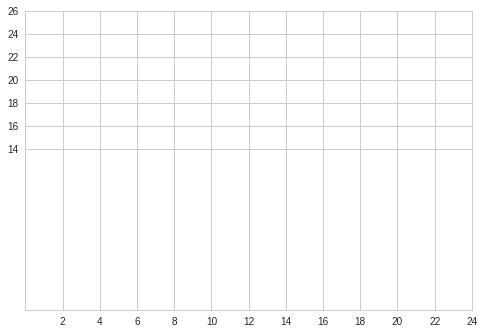

In [51]:
# 设置x轴和y轴显示的坐标值
plt.xticks([i/2 for i in range(4,49)][::4])
plt.yticks(range(int(min(y)),int(max(y))+1,2))

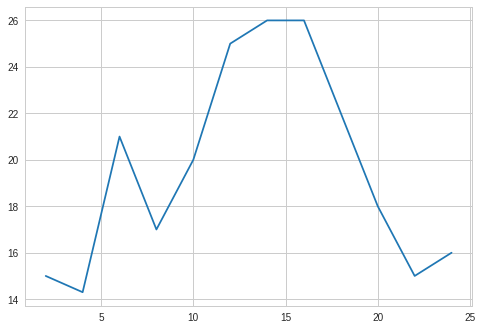

In [52]:
# 画图
plt.plot(x,y)
# 保存图片
# plt.savefig('myfig.png')

#### 绘制散点图

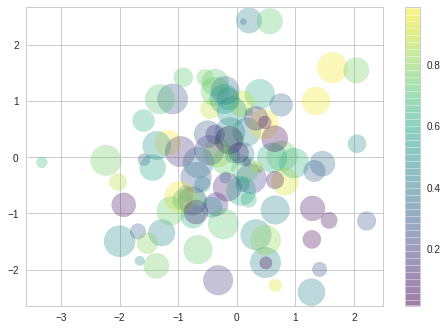

In [26]:
# 准备测试数据
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)
# 绘制散点图
plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar()

#### 示例 ：绘制iris特性相关数据散点图

In [27]:
# 从sklearn导入数据
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
features.shape

(4, 150)

In [28]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

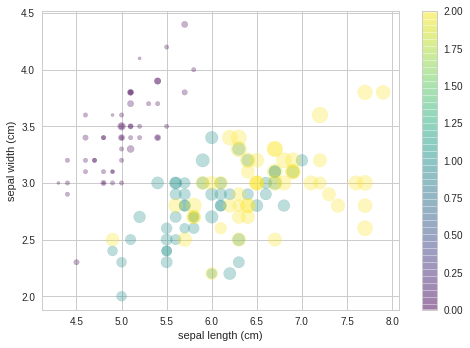

In [29]:
# 绘制散点图
plt.scatter(features[0],features[1],alpha=0.3,s=100*features[3],c=iris.target,cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar()

#### 绘制等高线图

In [30]:
# 准备测试数据
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

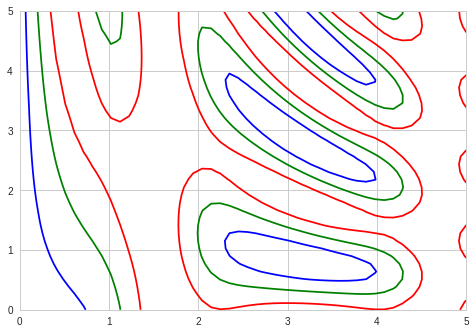

In [36]:
# contour with colors='black' or colors=['red','blue','green']
plt.contour(X,Y,Z,3,colors=['red','blue','green'])

<a list of 58 text.Text objects>

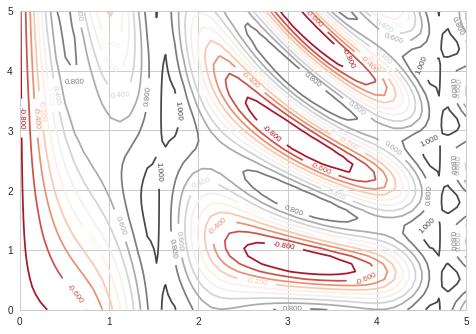

In [42]:
# contour with cmap='RdGy'
contours = plt.contour(X,Y,Z,10,cmap='RdGy')
# 在等高线上添加文字
plt.clabel(contours,inline=True,fontsize=8)

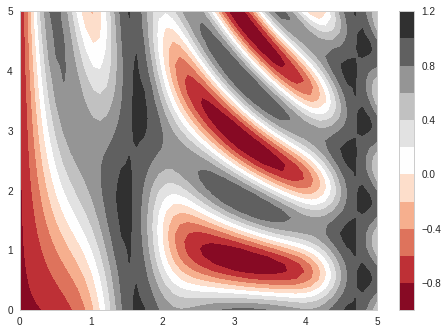

In [41]:
# contourf wuth cmap='RdGy'
plt.contourf(X,Y,Z,10,cmap='RdGy')
plt.colorbar()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.


(0.0, 5.0, 0.0, 5.0)

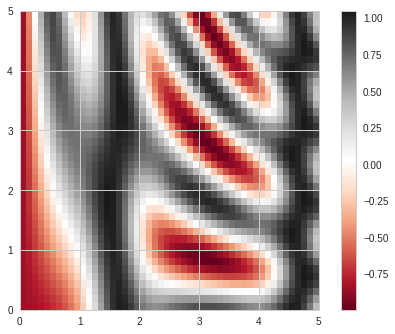

In [37]:
# 用图像的方式绘制等高线图
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

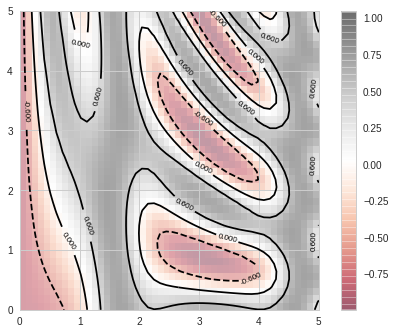

In [44]:
# 将等高线图和渐变背景组合起来变成一张图
contours = plt.contour(X,Y,Z,3,colors='black')
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.4)
plt.clabel(contours,inline=True,fontsize=8)
plt.colorbar()

#### 绘制直方图

In [53]:
# 准备数据
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

In [56]:
# 设置参数
kwargs = dict(histtype='stepfilled',alpha=0.3,density=False,bins=40)

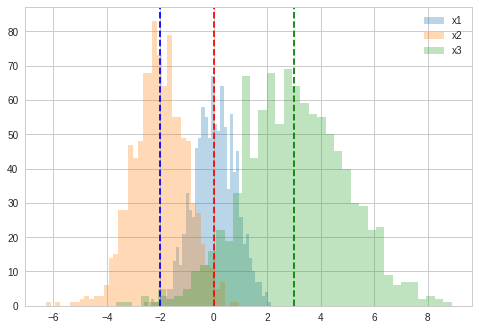

In [61]:
# 绘制直方图
plt.hist(x1,**kwargs,label='x1')
plt.hist(x2,**kwargs,label='x2')
plt.hist(x3,**kwargs,label='x3')
# 在x轴指定点处绘制垂直于x轴的直线
plt.axvline(x=0,color='red',linestyle='--')
plt.axvline(x=-2,color='blue',linestyle='--')
plt.axvline(x=3,color='green',linestyle='--')
# 绘制图例
plt.legend()

In [62]:
# 直接获取用于绘制直方图的数据
counts,bin_edges = np.histogram(x1,bins=5)
counts,bin_edges

(array([ 16, 155, 428, 334,  67]),
 array([-2.59302174, -1.64671251, -0.70040329,  0.24590593,  1.19221516,
         2.13852438]))

#### 分开设置图例

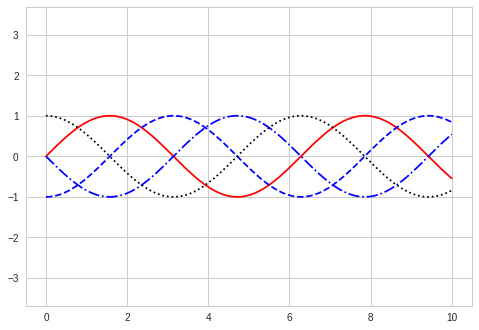

In [73]:
fig,ax = plt.subplots()
li = []
styles = ['-','--','-.',':']
colors = ['red','blue','blue','black']
x = np.linspace(0,10,1000)
for i in range(4):
#     li += ax.plot(x,np.sin(x-i*np.pi/2),styles[i],color='black')
    li.extend(ax.plot(x,np.sin(x-i*np.pi/2),styles[i],color=colors[i]))
# 设置头两条曲线的图例
plt.axis('equal')
ax.legend(lines[:2],['first','second'],loc='upper right',frameon=False)
# 设置后两条曲线的图例
from matplotlib.legend import Legend
leg = Legend(ax,lines[2:],['third','forth'],loc='lower right',frameon=False)
ax.add_artist(leg)